# Abordagem exaustiva

## Geração do grafo

In [1]:
%%writefile gera_grafo1.py
import networkx as nx
import random

# Parâmetros
num_vertices = 135  # Número de vértices no grafo
probabilidade_conexao = 0.7  # Probabilidade de haver uma aresta entre dois vértices (ajuste conforme necessário)

# Crie um grafo aleatório densamente conectado
grafo = nx.fast_gnp_random_graph(num_vertices, probabilidade_conexao)

# Nome do arquivo de saída
nome_arquivo = "grafo.txt"

# Abra o arquivo para escrita
with open(nome_arquivo, 'w') as arquivo:
    # Escreva a quantidade de vértices e número de arestas na primeira linha
    arquivo.write(f"{num_vertices} {grafo.number_of_edges()}\n")

    # Escreva as arestas no formato de lista de adjacência
    for aresta in grafo.edges():
        arquivo.write(f"{aresta[0]+1} {aresta[1]+1}\n")  # +1 para ajustar os índices (começando em 1)

print(f"Grafo densamente conectado gerado e salvo em '{nome_arquivo}'.")

# Image of the generated graph
import matplotlib.pyplot as plt

# Alterar edges do grafo para edge + 1
novas_arestas = [(u + 1, v + 1) for u, v in grafo.edges()]
novo_grafo = nx.Graph()
novo_grafo.add_edges_from(novas_arestas)
novo_grafo.add_nodes_from([n + 1 for n in grafo.nodes()])

# Desenhar o grafo
nx.draw(novo_grafo, with_labels=True)
plt.show()

Writing gera_grafo1.py


Grafo densamente conectado gerado e salvo em 'grafo.txt'.


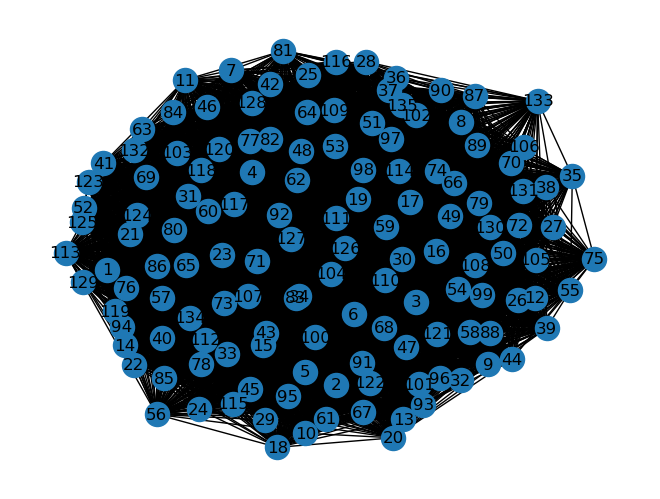

In [2]:
%run gera_grafo1.py

## Código implementado

In [3]:
%%writefile abordagem_exaustiva.cpp
#include <iostream>
#include <vector>
#include <fstream>
#include <algorithm>
#include <functional>

using namespace std;

vector<vector<int> > LerGrafo(const string& nomeArquivo, int& numVertices) {
    ifstream arquivo(nomeArquivo);
    int numArestas;
    arquivo >> numVertices >> numArestas;
    vector<vector<int> > grafo(numVertices, vector<int>(numVertices, 0));
    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;
    }
    arquivo.close();
    return grafo;
}

bool VerificaClique(const vector<vector<int> >& grafo, const vector<int>& clique) {
    for (int i = 0; i < clique.size(); i++) {
        for (int j = i + 1; j < clique.size(); j++) {
            if (grafo[clique[i]][clique[j]] == 0) { return false; }
        }
    }
    return true;
}

void EncontrarCliqueMaxima(const vector<vector<int> >& grafo, int numVertices, vector<int>& cliqueMaxima) {
    vector<int> atualClique;

    // Função recursiva para construir cliques
    auto backtrack = [&](int v, auto& backtrack_ref) -> void {
        // Atualiza se encontrar um clique maior
        if (atualClique.size() > cliqueMaxima.size()) { cliqueMaxima = atualClique; }

        for (int i = v; i < numVertices; i++) {
            atualClique.push_back(i);
            if (VerificaClique(grafo, atualClique)) { backtrack_ref(i + 1, backtrack_ref); }
            atualClique.pop_back();
        }
    };

    backtrack(0, backtrack);  // Inicia com o primeiro vértice
}

int main() {
    int numVertices = 135;
    vector<vector<int> > grafo = LerGrafo("grafo.txt", numVertices);
    vector<int> cliqueMaxima;
    EncontrarCliqueMaxima(grafo, numVertices, cliqueMaxima);
    cout << "Clique máxima arquivo saída: ";
    for(int i = 0; i < cliqueMaxima.size(); i++){ cout << cliqueMaxima[i] + 1 << " "; }
    cout << endl;
    return 0;
}

Writing abordagem_exaustiva.cpp


In [4]:
!g++ -std=c++17 abordagem_exaustiva.cpp -o abordagem_exaustiva

In [5]:
!./abordagem_exaustiva

Clique máxima arquivo saída: 1 15 18 22 23 24 27 59 63 73 85 88 91 100 103 111 


## Verificação da clique

In [6]:
%%writefile verificacao_da_clique.py
import networkx as nx

# Abrir o arquivo e pular a primeira linha
with open("grafo.txt", 'r') as arquivo:
    next(arquivo)  # Pula a primeira linha

    # Lê o grafo a partir das linhas restantes
    G = nx.parse_adjlist(arquivo)

# Encontrar todas as cliques maximais
cliques_maximais = list(nx.find_cliques(G))

# Encontrar a clique máxima (a maior)
clique_maxima = max(cliques_maximais, key=len)

# Salvar as cliques maximais em um arquivo
with open("verificacao.txt", 'w') as arquivo:
    arquivo.write(f"Cliques maximais encontradas\n")
    for clique in cliques_maximais:
        arquivo.write(f"{' '.join(map(str, clique))}\n")
    arquivo.write(f"\nClique máxima encontrada\n")
    arquivo.write(f"{len(clique_maxima)} = {' '.join(map(str, clique_maxima))}\n")

Writing verificacao_da_clique.py


In [7]:
%run verificacao_da_clique.py

In [8]:
with open('verificacao.txt', 'r') as file:
    lines = file.readlines()  # Lê todas as linhas
    ultima_linha = lines[-1]  # Pega a última linha
    _, numeros = ultima_linha.split("=", 1)
    lista = list(map(int, numeros.split()))
    lista.sort()
print(lista)

[1, 15, 18, 22, 23, 24, 27, 59, 63, 73, 85, 88, 91, 100, 103, 111]


## Análise e Pseudo-código

Agora com o código funcional, pode-se mencionar que ordenar os nós em função do grau de adjacência pode reduzir o tempo de execução. A ideia é processar primeiro os nós com maior grau, pois eles têm maior probabilidade de formar cliques maiores. Isso pode ser combinado com a remoção de nós que não podem contribuir para uma clique maior que a já encontrada.

Com um tempo hábil de 14.8 minutos, foi possível rodar o problema com um tamanho de 135 vértices.

Para otimizar essa tarefa exaustiva, pode-se observar o pseudo-código de uma heurística a seguir:


```
Função EncontrarCliqueMaxima(grafo, numVertices)
    cliqueMaxima = ListaVazia()
    candidatos = ListaDeNós()  # Inicialmente, todos os nós são candidatos
    Para cada i de 0 até numVertices - 1 Faça
        Adicione i à lista de candidatos
    Fim Para

    Ordenar candidatos por grau decrescente

    Para cada v em candidatos Faça
        cliqueAtual = ListaVazia()
        cliqueAtual.adicionar(v)
        novosCandidatos = ListaDeNós()

        Para cada u em candidatos Faça
            Se grafo[v][u] == 1 Então
                Adicione u a novosCandidatos
            Fim Se
        Fim Para

        BACKTRACKING(cliqueAtual, novosCandidatos)
    Fim Para

    Retorne cliqueMaxima
Fim Função


Função BACKTRACKING(cliqueAtual, candidatos)
    Se |cliqueAtual| > |cliqueMaxima| Então
        cliqueMaxima = cliqueAtual
    Fim Se

    Para cada v em candidatos Faça
        Se |cliqueAtual| + |candidatos| <= |cliqueMaxima| Então
            Retornar
        Fim Se

        cliqueAtual.adicionar(v)
        novosCandidatos = ListaDeNós()

        Para cada u em candidatos Faça
            Se grafo[v][u] == 1 Então
                Adicione u a novosCandidatos
            Fim Se
        Fim Para

        BACKTRACKING(cliqueAtual, novosCandidatos)
        cliqueAtual.remover(v)
    Fim Para
Fim Função
```


No código atual, uma estratégia de poda pode ser implementada ao limitar os candidatos para o clique com base no tamanho máximo possível, retornando se o tamanho do clique atual somado ao número de vértices restantes em candidatos não puder superar o clique máximo já encontrado, e com base na lista de vizinhos, trabalhando apenas com os vértices adjacentes.
